In [1]:
%matplotlib notebook
import os
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as td
import torchvision as tv
import pandas as pd
from PIL import Image
import socket
from matplotlib import pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from dataloader import VQADataset
from model import VQANet
from model import VQAStatsManager
import utils
import nntools as nt

In [3]:
train_set = VQADataset()
val_set = train_set

In [4]:
train_loader = td.DataLoader(train_set, batch_size=50, shuffle=True)

In [5]:
# iter(train_loader).next()[1].size()

In [6]:
vocab_size = train_set.get_vocabsize()
VQA_model = VQANet(vocab_size)
lr = 5e-4
VQA_model = VQA_model.to(device)
adam = torch.optim.Adam(VQA_model.parameters(), lr=lr)
stats_manager = VQAStatsManager()
VQA_train = nt.Experiment(VQA_model, train_set, val_set, adam, stats_manager,
               output_dir="vqa_train1", perform_validation_during_training=False)

In [7]:
def plot(exp, fig, axes):
    axes[0].clear()
    axes[1].clear()
    axes[0].plot([exp.history[k]['loss'] for k in range(exp.epoch)],
                 label="traininng loss")
    # axes[0].plot([exp.history[k][1]['loss'] for k in range(exp.epoch)], label="exalution loss")
    axes[1].plot([exp.history[k]['accuracy'] for k in range(exp.epoch)],label = 'training accuracy')
    # axes[1].plot([exp.history[k][1]['accuracy'] for k in range(exp.epoch)],label = 'evaluation accuracy')
    axes[0].legend()
    axes[1].legend()
    plt.tight_layout()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


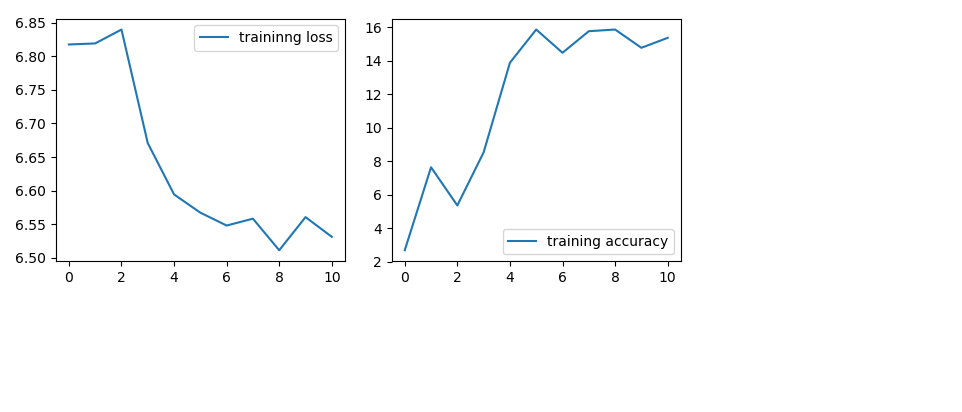

Start/Continue training from epoch 11


In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
torch.backends.cudnn.benchmark=True
VQA_train.run(num_epochs=100, plot=lambda exp: plot(exp, fig=fig, axes=axes))
torch.backends.cudnn.benchmark=False